In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from scipy.cluster.vq import kmeans,vq
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
from math import sqrt

In [4]:
df = pd.read_csv('data_stocks.csv')

In [5]:
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [6]:
df.set_index('DATE', inplace=True)

In [7]:
#Calculate percentage return and volatilities over the period
returns = df.pct_change().mean() * 109
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = df.pct_change().std() * sqrt(109)

returns.head()

#format the data as a numpy array to feed into the K-Means algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

Text(0.5, 1.0, 'Elbow curve')

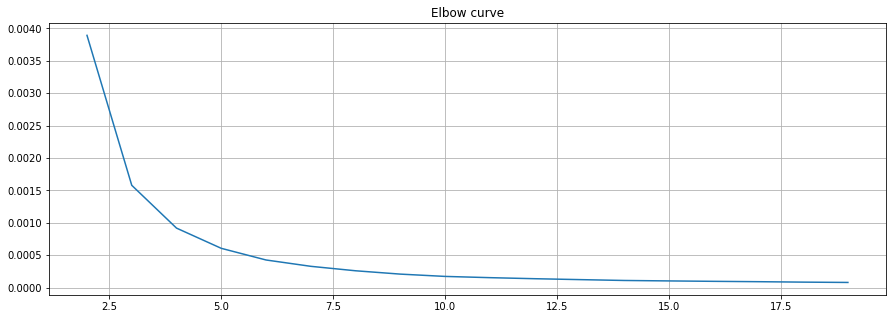

In [8]:
X = returns
distorsions = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distorsions.append(k_means.inertia_)
 
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

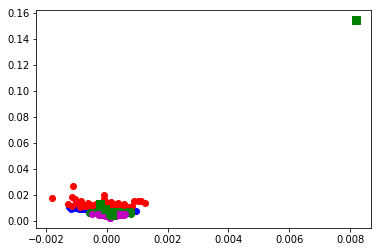

In [9]:
# computing K-Means with K = 5 (5 clusters)
centroids,_ = kmeans(data,5)

# assign each sample to a cluster
idx,_ = vq(data,centroids)
 
# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

In [10]:
#identify the outlier
print(returns.idxmax())

Returns       NYSE.XRX
Volatility    NYSE.XRX
dtype: object


In [11]:
#drop the relevant stock from our data
returns.drop('NYSE.XRX',inplace=True)

#recreate data to feed into the algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

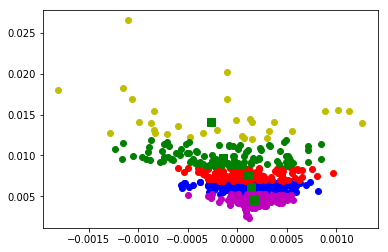

In [12]:
# computing K-Means with K = 5 (5 clusters)
centroids,_ = kmeans(data,5)
# assign each sample to a cluster
idx,_ = vq(data,centroids)
 
# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

In [13]:
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]

for detail in details:
    print(detail)

('SP500', 4)
('NASDAQ.AAL', 3)
('NASDAQ.AAPL', 0)
('NASDAQ.ADBE', 0)
('NASDAQ.ADI', 2)
('NASDAQ.ADP', 2)
('NASDAQ.ADSK', 3)
('NASDAQ.AKAM', 3)
('NASDAQ.ALXN', 3)
('NASDAQ.AMAT', 3)
('NASDAQ.AMD', 1)
('NASDAQ.AMGN', 0)
('NASDAQ.AMZN', 2)
('NASDAQ.ATVI', 2)
('NASDAQ.AVGO', 2)
('NASDAQ.BBBY', 3)
('NASDAQ.BIIB', 2)
('NASDAQ.CA', 3)
('NASDAQ.CBOE', 0)
('NASDAQ.CELG', 0)
('NASDAQ.CERN', 0)
('NASDAQ.CHRW', 2)
('NASDAQ.CHTR', 3)
('NASDAQ.CINF', 0)
('NASDAQ.CMCSA', 0)
('NASDAQ.CME', 0)
('NASDAQ.COST', 0)
('NASDAQ.CSCO', 0)
('NASDAQ.CSX', 2)
('NASDAQ.CTAS', 0)
('NASDAQ.CTSH', 4)
('NASDAQ.CTXS', 2)
('NASDAQ.DISCA', 3)
('NASDAQ.DISCK', 3)
('NASDAQ.DISH', 3)
('NASDAQ.DLTR', 3)
('NASDAQ.EA', 3)
('NASDAQ.EBAY', 2)
('NASDAQ.EQIX', 2)
('NASDAQ.ESRX', 3)
('NASDAQ.ETFC', 2)
('NASDAQ.EXPD', 0)
('NASDAQ.EXPE', 2)
('NASDAQ.FAST', 3)
('NASDAQ.FB', 0)
('NASDAQ.FFIV', 3)
('NASDAQ.FISV', 4)
('NASDAQ.FITB', 2)
('NASDAQ.FLIR', 2)
('NASDAQ.FOX', 2)
('NASDAQ.FOXA', 2)
('NASDAQ.GILD', 0)
('NASDAQ.GOOG', 0)
('NASDAQ.